<a href="https://colab.research.google.com/github/DawnHarper/TP_FINAL_MATE_III/blob/main/Tp_Final_Mate_III_Reeves_Salguero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TP FINAL MATEMATICA III 2024***

Integrantes:
- Reeves Lara
- Salguero Valentino

**CONTENIDOS** <br>
El csv utilizado contiene un total de 21 columnas con posibles indicadores de covid y 5433 filas que corresponden a personas entrevistadas. A continuacion detallamos el contenido de las columnas del csv y si fueron o no utilizadas para la prediccion de la red neuronal.
- **Breathing Problem:** Problemas respiratorios (Usada).
- **Fever:** Fiebre (Usada).
- **Dry Cough:** Tos seca (Usada).
- **Sore throat:** Dolor de garganta (Usada).
- **Running Nose:** Nariz congestionada (Usada).
- **Asthma:** Asma (No usada).
- **Chronic Lung Disease:** Enfermedad de pulmon cronica (No usada).
- **Headache:** Dolor de cabeza (Usada).
- **Heart Disease:** Enfermedades cardiacas (No usada).
- **Diabetes:** Diabetes (No usada).
- **Hyper Tension:** Hipertension (No usada).
- **Fatigue:** Fatiga (Usada).
- **Gastrointestinal:** Gastrointestinal (Usada).
- **Abroad travel:** Viaje al exterior (Usada).
- **Contact with COVID Patient:** Contacto con paciente con COVID (Usada).
- **Attended Large Gathering:** Asistencia a grandes reuniones (No usada).
- **Visited Public Exposed Places:** Visita a lugares publicos (No usada).
- **Family working in Public Exposed Places:** Familia trabajando en lugares publicos (No usada).
- **Wearing Masks:** Uso de mascara (No usada).
- **Sanitization from Market:** sanitizacion (No usada).
- **COVID-19:** Elemento a predecir. <br>
Se utilizaron sobre todo aquellos elementos que corresponden a los sintomas tipicos del COVID-19 y algunas situaciones que pueden exponer al paciente a contraer el virus.

# **• Parte 1: Selección y Análisis de la Base de Datos**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
import io

In [3]:
#Leemos el csv desde el raw del repositorio de Github
url = "https://raw.githubusercontent.com/DawnHarper/TP_FINAL_MATE_III/main/Covid%20Dataset.csv"
df = pd.read_csv(url)

In [4]:
df.head(10) #Printeamos los primeros 10 valores que corresponden a COVID positivo

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
5,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,Yes
6,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,...,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes
7,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,...,No,Yes,Yes,No,No,Yes,No,No,No,Yes
8,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Yes,...,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
9,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,...,Yes,No,No,No,No,Yes,No,No,No,Yes


In [5]:
df.tail(10) #Printeamos los 10 ultimos valores que corresponden a COVID negativo

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
5424,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,Yes
5425,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5426,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5427,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,Yes
5428,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,Yes
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5433,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,No


In [6]:
print(df.columns) #Columnas

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')


In [7]:
#Definimos diccionarios para cada una de las columnas para reemplazar los valores
#En este caso todas son binarias (Si o No), por lo cual todas seran reemplazadas por 1 o 0

breathProb_rep ={
    "Yes" : 1,
    "No" : 0
}
fever_rep ={
    "Yes" : 1,
    "No" : 0
}
cough_rep ={
    "Yes" : 1,
    "No" : 0
}
sore_rep ={
    "Yes" : 1,
    "No" : 0
}
runningNose_rep ={
    "Yes" : 1,
    "No" : 0
}
asthma_rep ={
    "Yes" : 1,
    "No" : 0
}
lungDis_rep ={
    "Yes" : 1,
    "No" : 0
}
headache_rep ={
    "Yes" : 1,
    "No" : 0
}
heartDis_rep ={
    "Yes" : 1,
    "No" : 0
}
diabetes_rep ={
    "Yes" : 1,
    "No" : 0
}
tension_rep ={
    "Yes" : 1,
    "No" : 0
}
fatigue_rep ={
    "Yes" : 1,
    "No" : 0
}
gastro_rep ={
    "Yes" : 1,
    "No" : 0
}
travel_rep ={
    "Yes" : 1,
    "No" : 0
}
contact_rep ={
    "Yes" : 1,
    "No" : 0
}
attend_rep ={
    "Yes" : 1,
    "No" : 0
}
exposedPlaces_rep ={
    "Yes" : 1,
    "No" : 0
}
FamilyExposed_rep ={
    "Yes" : 1,
    "No" : 0
}
mask_rep ={
    "Yes" : 1,
    "No" : 0
}
sanit_rep ={
    "Yes" : 1,
    "No" : 0
}
covid_rep ={
    "Yes" : 1,
    "No" : 0
}

In [8]:
#Creamos el diccionario que contiene las columnas y su respectivo reemplazo

rep_d = {
    "Breathing Problem": breathProb_rep,
    "Fever": fever_rep,
    "Dry Cough": cough_rep,
    "Sore throat": sore_rep,
    "Running Nose": runningNose_rep,
    "Asthma": asthma_rep,
    "Chronic Lung Disease": lungDis_rep,
    "Headache": headache_rep,
    "Heart Disease": heartDis_rep,
    "Diabetes": diabetes_rep,
    "Hyper Tension": tension_rep,
    "Fatigue ": fatigue_rep,
    "Gastrointestinal ": gastro_rep,
    "Abroad travel": travel_rep,
    "Contact with COVID Patient": contact_rep,
    "Attended Large Gathering": attend_rep,
    "Visited Public Exposed Places": exposedPlaces_rep,
    "Family working in Public Exposed Places": FamilyExposed_rep,
    "Wearing Masks": mask_rep,
    "Sanitization from Market": sanit_rep,
    "COVID-19": covid_rep
}

In [9]:
# Reemplazamos los valores
for col, rep in rep_d.items():
    df[col] = df[col].replace(rep)
print("\nDataFrame despues de reemplazos:")
df.head()


DataFrame despues de reemplazos:


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


array([[<Axes: title={'center': 'Breathing Problem'}>,
        <Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Dry Cough'}>,
        <Axes: title={'center': 'Sore throat'}>,
        <Axes: title={'center': 'Running Nose'}>],
       [<Axes: title={'center': 'Asthma'}>,
        <Axes: title={'center': 'Chronic Lung Disease'}>,
        <Axes: title={'center': 'Headache'}>,
        <Axes: title={'center': 'Heart Disease'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Hyper Tension'}>,
        <Axes: title={'center': 'Fatigue '}>,
        <Axes: title={'center': 'Gastrointestinal '}>,
        <Axes: title={'center': 'Abroad travel'}>,
        <Axes: title={'center': 'Contact with COVID Patient'}>],
       [<Axes: title={'center': 'Attended Large Gathering'}>,
        <Axes: title={'center': 'Visited Public Exposed Places'}>,
        <Axes: title={'center': 'Family working in Public Exposed Places'}>,
        <Axes: title={'center': 'We

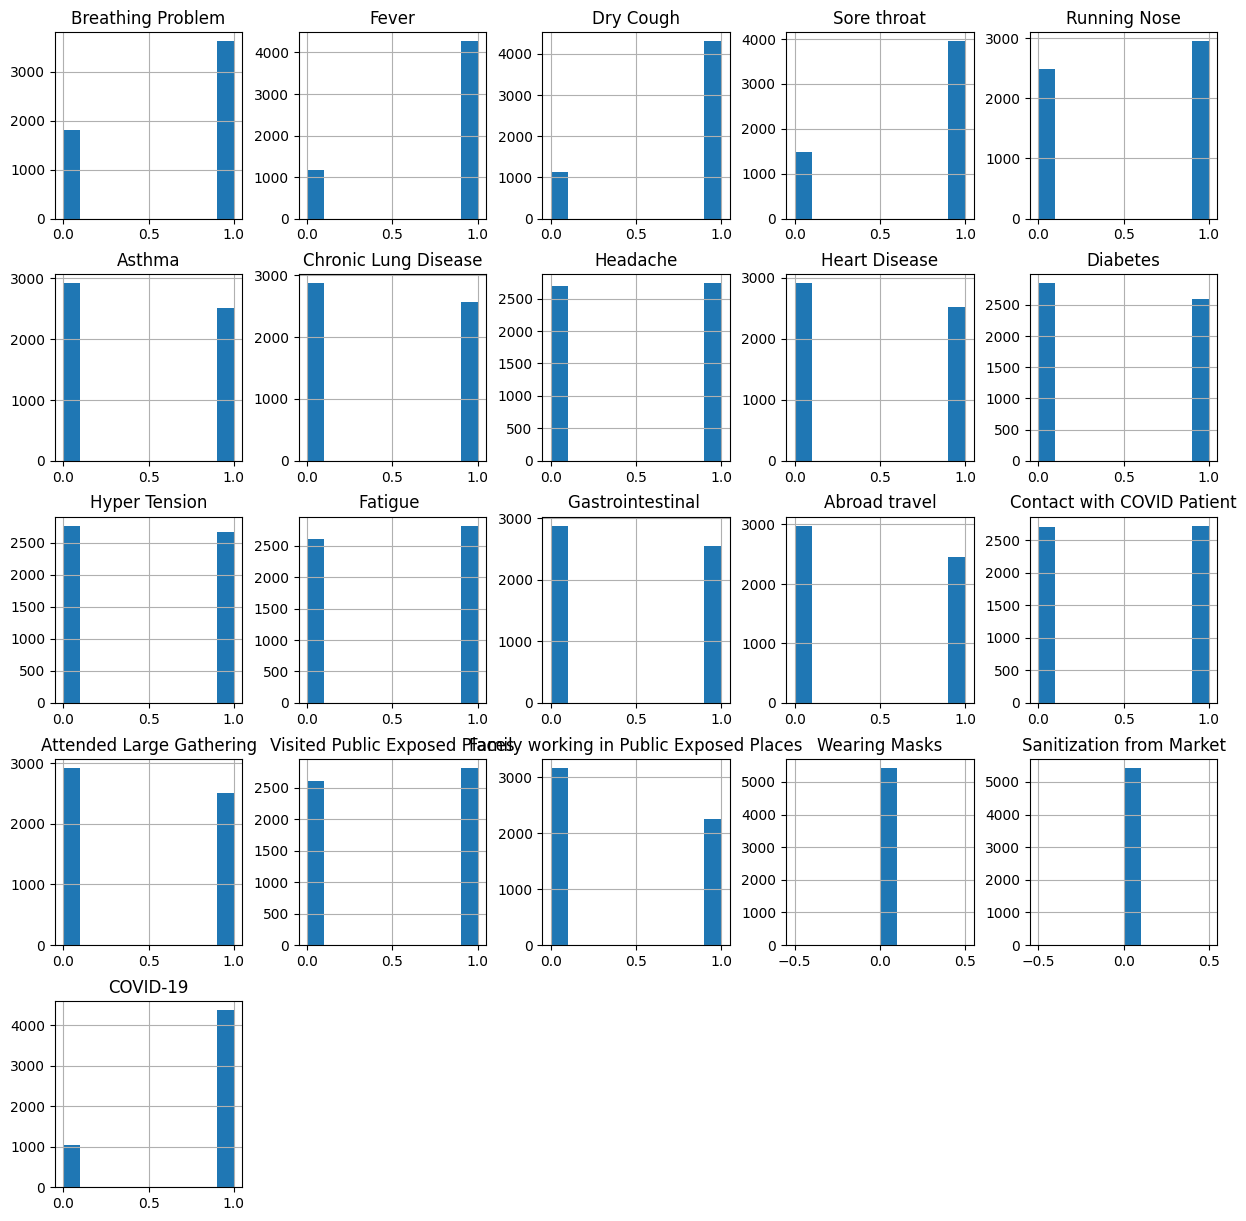

In [10]:
df.hist(figsize=(15, 15)) #Printeamos el histograma para ver los valores

In [11]:
# Seleccionamos solo las columnas numericas para el analisis de valores atipicos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculamos el IQR para cada columna
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identificamos valores atipicos
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Contamos el numero de valores atipicos
num_outliers = outliers.sum()
print("Filas con Valores Atípicos:", num_outliers)

Filas con Valores Atípicos: 2113


In [12]:
# Normaliza
df_stats = df.describe().T
df_n = (df - df_stats['mean']) / df_stats['std']  # Normalización
print("\nDataFrame normalizado:")
df_n.describe()


DataFrame normalizado:


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5.434000e+03,5.434000e+03,5.434000e+03,5.434000e+03,5434.000000,5434.000000,5.434000e+03,5.434000e+03,5.434000e+03,5.434000e+03,...,5.434000e+03,5.434000e+03,5.434000e+03,5.434000e+03,5.434000e+03,5.434000e+03,5.434000e+03,0.0,0.0,5.434000e+03
mean,-2.092139e-16,1.673711e-16,2.092139e-16,8.368556e-17,0.000000,0.000000,-5.230348e-17,-1.255283e-16,5.230348e-18,3.007450e-17,...,3.922761e-17,-6.930211e-17,6.276417e-17,8.368556e-17,-6.276417e-17,6.276417e-17,-7.322487e-17,NaN,NaN,-1.673711e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,1.000000e+00
min,-1.412523e+00,-1.918273e+00,-1.954724e+00,-1.633601e+00,-1.090479,-0.927793,-9.454497e-01,-1.006925e+00,-9.308883e-01,-9.535088e-01,...,-1.038943e+00,-9.405739e-01,-9.063690e-01,-1.003226e+00,-9.264206e-01,-1.038560e+00,-8.443835e-01,NaN,NaN,-2.041947e+00
25%,-1.412523e+00,5.212064e-01,5.114869e-01,-1.633601e+00,-1.090479,-0.927793,-9.454497e-01,-1.006925e+00,-9.308883e-01,-9.535088e-01,...,-1.038943e+00,-9.405739e-01,-9.063690e-01,-1.003226e+00,-9.264206e-01,-1.038560e+00,-8.443835e-01,NaN,NaN,4.896386e-01
50%,7.078225e-01,5.212064e-01,5.114869e-01,6.120320e-01,0.916859,-0.927793,-9.454497e-01,9.929399e-01,-9.308883e-01,-9.535088e-01,...,9.623392e-01,-9.405739e-01,-9.063690e-01,9.966013e-01,-9.264206e-01,9.626940e-01,-8.443835e-01,NaN,NaN,4.896386e-01
75%,7.078225e-01,5.212064e-01,5.114869e-01,6.120320e-01,0.916859,1.077628,1.057503e+00,9.929399e-01,1.074045e+00,1.048565e+00,...,9.623392e-01,1.062985e+00,1.103100e+00,9.966013e-01,1.079225e+00,9.626940e-01,1.184078e+00,NaN,NaN,4.896386e-01
max,7.078225e-01,5.212064e-01,5.114869e-01,6.120320e-01,0.916859,1.077628,1.057503e+00,9.929399e-01,1.074045e+00,1.048565e+00,...,9.623392e-01,1.062985e+00,1.103100e+00,9.966013e-01,1.079225e+00,9.626940e-01,1.184078e+00,NaN,NaN,4.896386e-01


In [13]:
# Calculamos y mostramos la matriz de correlacion
corr_matrix = df_n.corr()
print("\nMatriz de correlacion:")
df_n.corr()


Matriz de correlacion:


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,...,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,NaN,NaN,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,...,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,NaN,NaN,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,...,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,NaN,NaN,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,...,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,NaN,NaN,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,...,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,NaN,NaN,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,...,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,NaN,NaN,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,...,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,NaN,NaN,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,...,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,NaN,NaN,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,...,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,NaN,NaN,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,...,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,NaN,NaN,0.040627


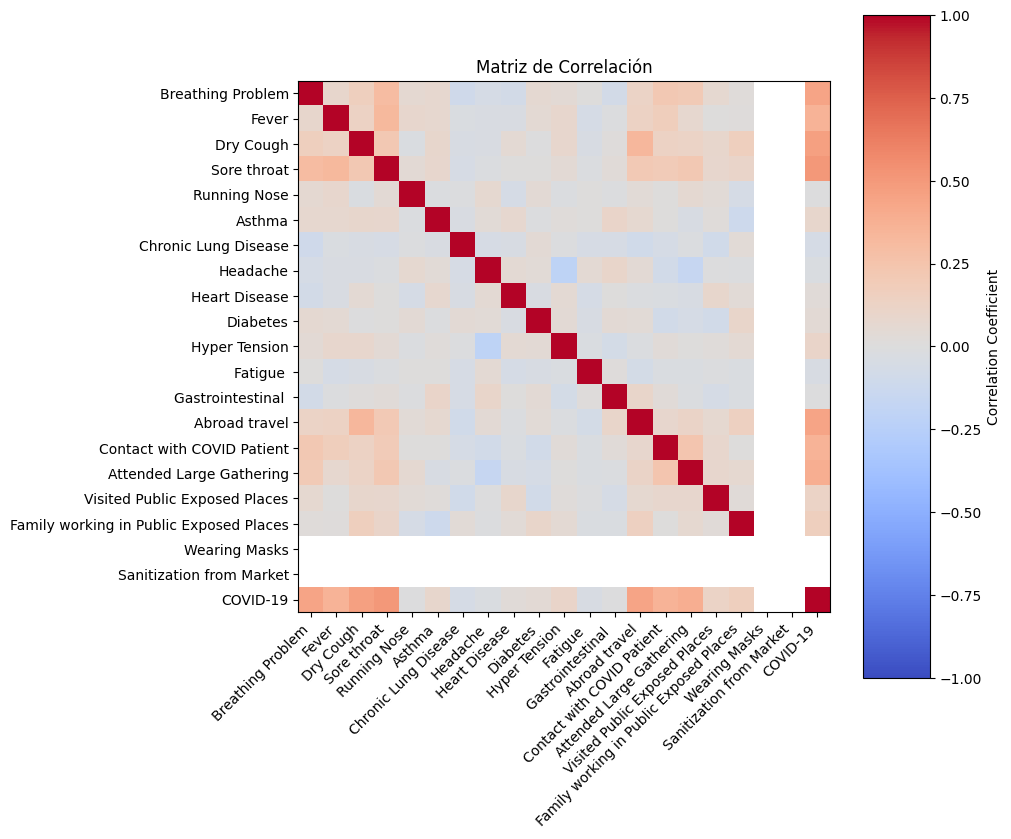

In [14]:
# Visualiza la matriz de correlacion
labels = df_n.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))

# Muestra la matriz de correlacion
cax = ax.imshow(corr_matrix.to_numpy(), cmap='coolwarm', vmin=-1, vmax=1)

# Ajusta
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)

# Añade una barra de color
cbar = fig.colorbar(cax, ax=ax, shrink=0.8, aspect=10)
cbar.set_label('Correlation Coefficient')

# Añade título
ax.set_title('Matriz de Correlación')

# Ajusta el diseño
plt.tight_layout()

plt.show()

In [15]:
# Definimos las características y etiquetas que nos interesan
features = ["Breathing Problem","Fever","Dry Cough","Sore throat","Running Nose","Headache","Fatigue " ,
            "Gastrointestinal " ,"Abroad travel","Contact with COVID Patient"]  # Seleccionar las características relevantes

In [16]:
df[df["COVID-19"]==0].head(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
4075,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,1,1,0,0,0
4076,0,0,0,0,1,0,1,0,0,0,...,1,0,0,1,1,1,1,0,0,0
4077,0,0,0,0,1,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
4078,0,0,0,0,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
4079,0,0,0,0,1,0,0,1,1,1,...,1,1,0,0,0,0,1,0,0,0
4080,0,0,0,0,1,0,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0
4081,0,0,0,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,0,0
4082,0,0,0,0,1,1,1,1,0,0,...,0,0,0,1,1,1,0,0,0,0
4083,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
4084,0,0,0,0,1,0,1,1,0,1,...,1,1,0,0,1,0,1,0,0,0


In [17]:
df[df["COVID-19"]==1].head(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
5,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,1,0,0,0,1,0,1,1,...,1,1,0,0,1,1,1,0,0,1
7,1,1,1,0,1,1,0,0,0,1,...,0,1,1,0,0,1,0,0,0,1
8,1,1,1,0,1,0,1,0,0,1,...,1,0,1,1,1,0,0,0,0,1
9,1,1,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


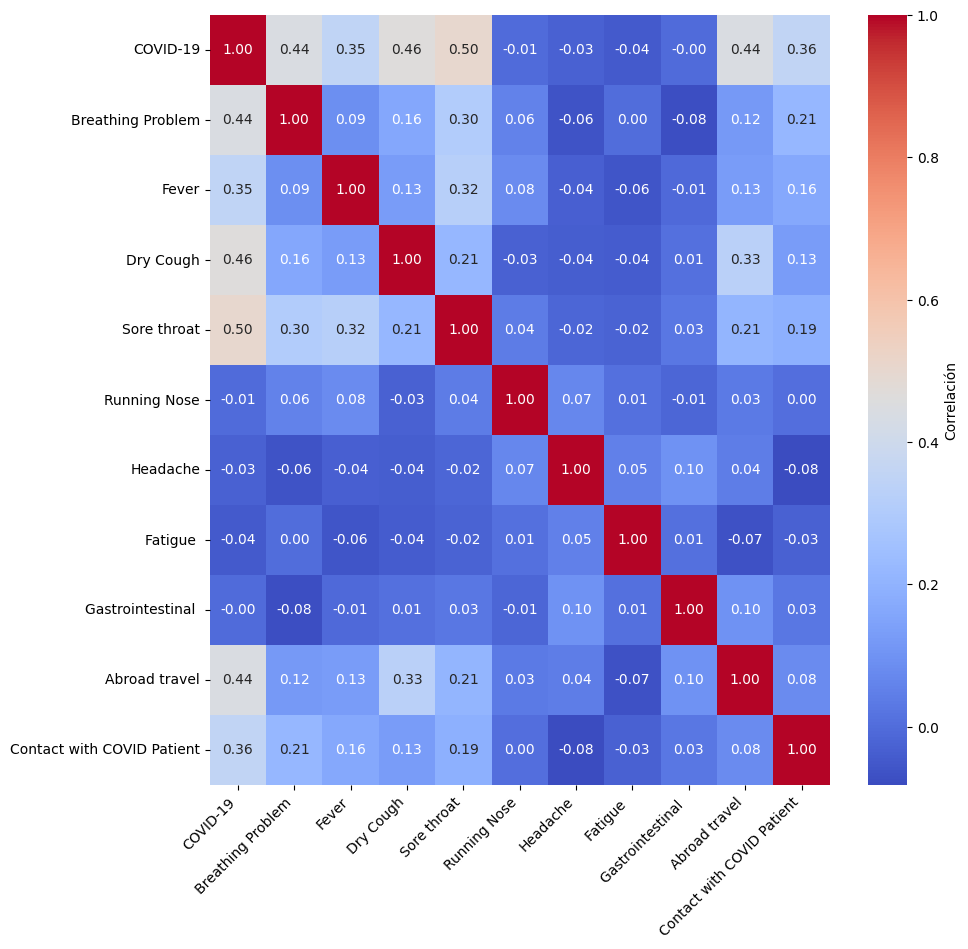

In [18]:
# Agrega la columna objetivo 'COVID-19' a la lista de características
labels = df.loc[:, ["COVID-19"] + features].columns.to_list()

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Muestra la matriz de correlación con el tema 'coolwarm'
cax = df.loc[:, ["COVID-19"] + features].corr()

# Muestra la matriz de correlación con seaborn.heatmap
sns.heatmap(cax, cmap='coolwarm', annot=True, fmt=".2f", ax=ax, xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Correlación'})

# Establece las etiquetas de los ejes
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0, ha='right')

# Muestra el gráfico
plt.show()

# **• Parte 2: Desarrollo de la Red Neuronal**

# **Entrenamiento**



In [19]:
X = df[features].values
Y = df['COVID-19'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

In [20]:
# Número de registros de entrenamiento
n = X_train.shape[0]
print(n)
np.random.seed(10)

# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(5, 10)
w_output = np.random.rand(1, 5)

b_hidden = np.random.rand(5, 1)
b_output = np.random.rand(1, 1)

# Funciones de activación
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))
# Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

print(b_hidden)
print(b_output)
print(w_hidden)
print(w_output)

# Función para propagar hacia adelante (forward propagation)
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    #print(f'{Z1=}')
    A1 = relu(Z1)
    #print(f'{A1=}')
    Z2 = w_output @ A1 + b_output
    #print(f'{Z2=}')
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

3622
[[0.94426071]
 [0.98762547]
 [0.45630455]
 [0.82612284]
 [0.25137413]]
[[0.59737165]]
[[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665
  0.19806286 0.76053071 0.16911084 0.08833981]
 [0.68535982 0.95339335 0.00394827 0.51219226 0.81262096 0.61252607
  0.72175532 0.29187607 0.91777412 0.71457578]
 [0.54254437 0.14217005 0.37334076 0.67413362 0.44183317 0.43401399
  0.61776698 0.51313824 0.65039718 0.60103895]
 [0.8052232  0.52164715 0.90864888 0.31923609 0.09045935 0.30070006
  0.11398436 0.82868133 0.04689632 0.62628715]
 [0.54758616 0.819287   0.19894754 0.8568503  0.35165264 0.75464769
  0.29596171 0.88393648 0.32551164 0.1650159 ]]
[[0.39252924 0.09346037 0.82110566 0.15115202 0.38411445]]


In [21]:
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])

In [22]:
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.46%


In [23]:
L = 0.01  # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutar descenso de gradiente
for i in range(30_000):
    # seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

In [24]:
test_predictions = forward_prop(X_test.T)[3]  # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= 0.5).astype(int).flatten(), Y_test)
accuracy = np.mean(test_comparisons)

In [25]:
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.17%


# **Prueba**

In [26]:
nuevosFeatures = ["Breathing Problem","Fever","Dry Cough","Sore throat","Running Nose","Headache","Fatigue " ,
            "Gastrointestinal " ,"Abroad travel","Contact with COVID Patient"] # Defino las caracteristicas de entrada para las pruebas

# Filtro ejemplos
# Busco filas random de el dataset escalado para que los datos se ingresen escalados
# Tomo filas aleatorias del DataFrame 'df'
filas_aleatorias = df.loc[:, ["COVID-19"] + features].sample(n=10)

# Imprimo las filas aleatorias
filas_aleatorias

,COVID-19,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Headache,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient
753,1,1,1,1,1,0,0,1,0,0,1
1470,1,1,1,1,1,1,1,0,1,0,1
1408,1,1,1,1,1,0,0,1,0,1,1
1494,1,1,1,1,1,1,0,0,0,1,1
3336,1,1,1,1,0,0,0,1,0,0,1
3534,1,0,1,1,1,1,0,0,1,1,0
656,1,1,1,1,1,1,0,1,0,1,1
3602,1,0,1,1,1,0,0,1,0,1,0
3000,1,1,1,0,1,0,0,1,1,1,1
4898,0,0,0,0,0,0,1,1,1,0,0


In [27]:
# Eliminar la columna 'COVID-19' del DataFrame 'filas_aleatorias'
df_ejemplos = filas_aleatorias.drop(columns=["COVID-19"])

# Imprimir elfFrame después de eliminar la columna
df_ejemplos

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Headache,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient
753,1,1,1,1,0,0,1,0,0,1
1470,1,1,1,1,1,1,0,1,0,1
1408,1,1,1,1,0,0,1,0,1,1
1494,1,1,1,1,1,0,0,0,1,1
3336,1,1,1,0,0,0,1,0,0,1
3534,0,1,1,1,1,0,0,1,1,0
656,1,1,1,1,1,0,1,0,1,1
3602,0,1,1,1,0,0,1,0,1,0
3000,1,1,0,1,0,0,1,1,1,1
4898,0,0,0,0,0,1,1,1,0,0


In [28]:
df_ejemplos.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Headache,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.700000,0.900000,0.800000,0.800000,0.400000,0.200000,0.700000,0.400000,0.600000,0.700000
std,0.483046,0.316228,0.421637,0.421637,0.516398,0.421637,0.483046,0.516398,0.516398,0.483046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Suponiendo que 'df_ejemplos' es tu DataFrame con ejemplos
print(f'El resultado tiene un {accuracy * 100:.2f}% de presición')
for index, row in df_ejemplos.iterrows():
    ejemplo_actual = row.values.reshape(1, -1)  # Convertir la fila en una matriz de una sola fila

    # Propagar hacia adelante el ejemplo actual a través de la red neuronal
    Z1_new, A1_new, Z2_new, A2_new = forward_prop(ejemplo_actual.transpose())

    # Obtener la predicción (0 para positivo y 1 para negativo) usando un umbral de 0.5
    prediccion_actual = (A2_new > 0.5).astype(int)
    prediccion_actual_resul = "Positivo" if prediccion_actual == 1 else "Negativo"

    # Mostrar la predicción actual
    print(f"Ejemplo actual (Paciente {index}):\n{ejemplo_actual}\n")
    print(f"Predicción para el paciente {index}: {prediccion_actual_resul}")
    print(f"Activaciones de la capa de salida para el paciente {index}: {A2_new}\n")


El resultado tiene un 91.17% de presición
Ejemplo actual (Paciente 753):
[[1 1 1 1 0 0 1 0 0 1]]

Predicción para el paciente 753: Positivo
Activaciones de la capa de salida para el paciente 753: [[0.99977357]]

Ejemplo actual (Paciente 1470):
[[1 1 1 1 1 1 0 1 0 1]]

Predicción para el paciente 1470: Positivo
Activaciones de la capa de salida para el paciente 1470: [[0.99596939]]

Ejemplo actual (Paciente 1408):
[[1 1 1 1 0 0 1 0 1 1]]

Predicción para el paciente 1408: Positivo
Activaciones de la capa de salida para el paciente 1408: [[1.]]

Ejemplo actual (Paciente 1494):
[[1 1 1 1 1 0 0 0 1 1]]

Predicción para el paciente 1494: Positivo
Activaciones de la capa de salida para el paciente 1494: [[1.]]

Ejemplo actual (Paciente 3336):
[[1 1 1 0 0 0 1 0 0 1]]

Predicción para el paciente 3336: Positivo
Activaciones de la capa de salida para el paciente 3336: [[0.96668743]]

Ejemplo actual (Paciente 3534):
[[0 1 1 1 1 0 0 1 1 0]]

Predicción para el paciente 3534: Positivo
Activaciones

In [30]:
#Ejemplo interactivo
input_data = []
print("Ingrese 1 para SI y 0 para NO.")
for feature in features:
    valor = float(input(f"Ingrese el valor para '{feature}': "))
    while valor != 0 and valor != 1:
        print('El valor ingresado no es correcto.')
        print("Ingrese 1 para SI y 0 para NO.")
        valor = float(input(f"Ingrese el valor para '{feature}': "))
    input_data.append(valor)

ejemplo_actual = np.array(input_data).reshape(1, -1)

# Propagar hacia adelante el ejemplo actual a través de la red neuronal
Z1_new, A1_new, Z2_new, A2_new = forward_prop(ejemplo_actual.transpose())

# Obtener la predicción (0 para negativo y 1 para positivo) usando un umbral de 0.5
prediccion_actual = (A2_new >= 0.5).astype(int)
prediccion_actual_resul = "Positivo" if prediccion_actual == 1 else "Negativo"

# Mostrar la predicción actual
print(f'El resultado tiene un {accuracy * 100:.2f}% de presición')
print(f"Ejemplo actual:\n{ejemplo_actual}\n")
print(f"Predicción: {prediccion_actual_resul}")
print(f"Activaciones de la capa de salida: {A2_new}\n")

Ingrese 1 para SI y 0 para NO.
Ingrese el valor para 'Breathing Problem': 0
Ingrese el valor para 'Fever': 1
Ingrese el valor para 'Dry Cough': 0
Ingrese el valor para 'Sore throat': 1
Ingrese el valor para 'Running Nose': 0
Ingrese el valor para 'Headache': 0
Ingrese el valor para 'Fatigue ': 0
Ingrese el valor para 'Gastrointestinal ': 0
Ingrese el valor para 'Abroad travel': 0
Ingrese el valor para 'Contact with COVID Patient': 0
El resultado tiene un 91.17% de presición
Ejemplo actual:
[[0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]]

Predicción: Positivo
Activaciones de la capa de salida: [[0.80711313]]



# **SKLEARN**

In [34]:
# cargar datos
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X = df[features].values
Y = df['COVID-19'].values

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(5),
                   activation='relu',
                   max_iter=50_000,
                   learning_rate_init=.05)

nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
print(nn.coefs_)
print("")
print(nn.intercepts_)
print("")
print("")

print(f"Puntaje del conjunto de entrenamiento: %{nn.score(X_train, Y_train)* 100:.2f}")
print(f"Puntaje del conjunto de prueba: %{nn.score(X_test, Y_test)* 100:.2f}")

[array([[ 0.37297971,  0.35998905, -1.28933081,  0.04557937, -0.66617926],
       [-0.03023348,  0.17268862,  1.47539441, -0.02351727, -1.29658351],
       [ 0.26397461,  0.36471668, -2.35403214,  0.47471159,  0.56918441],
       [ 0.29346379,  0.06904058, -0.87013601,  0.24103262, -1.02808827],
       [-0.37499442, -0.08037665,  0.38825505, -0.38585576, -0.44371536],
       [-0.10202324,  0.04980585,  0.17231043,  0.15674173,  0.52357268],
       [-0.09054216, -0.32719094,  0.75458286, -0.65630443, -1.05188001],
       [ 0.24353286,  0.25460591,  0.02361925, -0.23213605, -0.11437126],
       [ 0.82089125,  1.02942173, -0.09667332,  2.47108309, -1.09344407],
       [ 0.76182107,  0.19885178, -0.43359167,  0.46476756, -1.02121118]]), array([[ 0.714321  ],
       [ 0.70338089],
       [-3.0173569 ],
       [ 2.23963005],
       [-3.3390374 ]])]

[array([0.42889936, 0.40198971, 0.34085483, 1.43143159, 2.78139711]), array([-1.45291544])]


Puntaje del conjunto de entrenamiento: %96.69
Punt

In [32]:
for index, row in df_ejemplos.iterrows():
    ejemplo_actual = row.values.reshape(1, -1)  # Convertir la fila en una matriz de una sola fila
    predicciones = nn.predict(ejemplo_actual)
    print(ejemplo_actual)
    print(" ")
    print("Predicciones:", predicciones)
    print(" ")
    print(" ")

[[1 1 1 1 0 0 1 0 0 1]]
 
Predicciones: [1]
 
 
[[1 1 1 1 1 1 0 1 0 1]]
 
Predicciones: [1]
 
 
[[1 1 1 1 0 0 1 0 1 1]]
 
Predicciones: [1]
 
 
[[1 1 1 1 1 0 0 0 1 1]]
 
Predicciones: [1]
 
 
[[1 1 1 0 0 0 1 0 0 1]]
 
Predicciones: [1]
 
 
[[0 1 1 1 1 0 0 1 1 0]]
 
Predicciones: [1]
 
 
[[1 1 1 1 1 0 1 0 1 1]]
 
Predicciones: [1]
 
 
[[0 1 1 1 0 0 1 0 1 0]]
 
Predicciones: [1]
 
 
[[1 1 0 1 0 0 1 1 1 1]]
 
Predicciones: [1]
 
 
[[0 0 0 0 0 1 1 1 0 0]]
 
Predicciones: [0]
 
 
